In [15]:
import sys
#import queue
import time

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
def char2num(char):
    if char == 'S':
        num = -ord('a') + 96
    elif char == 'E':
        num = -ord('z') + 96
    else:
        num = ord(char) - 96
    return num


## load input.
with open('input.txt') as f:
    lines = f.read().strip().split('\n')
heights = np.array([[char2num(char) for char in list(line)] for line in lines])
#heights


## get start/goal position.
i = np.where(heights == -1)
start_row = i[0][0]
start_col = i[1][0]

i = np.where(heights == -26)
goal_row = i[0][0]
goal_col = i[1][0]

print(f"start: ({start_row}, {start_col})")
print(f"goal: ({goal_row}, {goal_col})")


## return the start / end to the original value.
heights[start_row][start_col] *= -1
heights[goal_row][goal_col]   *= -1
heights

start: (20, 0)
goal: (20, 136)


array([[1, 2, 1, ..., 1, 1, 1],
       [1, 2, 1, ..., 1, 1, 1],
       [1, 2, 3, ..., 1, 1, 1],
       ...,
       [1, 2, 3, ..., 3, 1, 1],
       [1, 2, 3, ..., 1, 1, 1],
       [1, 2, 3, ..., 1, 1, 1]])

In [17]:
def _get_options(heights, row, col):
    row_max, col_max = np.shape(heights)
    options = []
    if not row == 0:
        options.append([row-1, col])
    if not row == row_max-1:
        options.append([row+1, col])
    if not col == 0:
        options.append([row, col-1])
    if not col == col_max-1:
        options.append([row, col+1])
    return options
        
def get_options(heights, row, col):    
    options_ = _get_options(heights, row, col)
    #options_ = np.array(options_)
    
    x = heights[row, col]
    
    # if x is at start / goal, height should be positive.
    if x < 0:
        x *= -1
        
    options = []
    for option in options_:
        x_next = heights[option[0], option[1]]
        #print(f"{option}: {x_next}, {x}")
        if x_next - x <= 1:
            options.append(option)

    return options

def get_direction(vec):
    direction = 0
    if np.array_equal(vec, np.array([1, 0])):
        direction = 1
    elif np.array_equal(vec, np.array([0, 1])):
        direction = 2
    elif np.array_equal(vec, np.array([-1, 0])):
        direction = 3
    elif np.array_equal(vec, np.array([0, -1])):
        direction = 4
    return direction

def remove_duplicates(options):
    return set(tuple(option) for option in options)
   

def get_unchecked(checked):
    i = np.where(checked == 0)
    return np.array([i[0], i[1]]).T

def next_x(checked):
    for x in get_unchecked(checked):
    #x = get_unchecked(checked)[0]
        touched = [checked[option[0], option[1]] for option in _get_options(heights, x[0], x[1])]
        if any(touched):
            break
    return x

vec2dir_map = {'V': np.array([1, 0]), '>': np.array([0, 1]), '^': np.array([-1, 0]), '<': np.array([0, -1])}
def get_mark(vec):
    for key, value in vec2dir_map.items():
        value_ = value-vec
        if value_[0] == 0 and value_[1] == 0:
            return key
        
def get_paths(direction_char):
    paths = []
    x = np.array([goal_row, goal_col])
    paths.append(x)
    while not(x[0] == start_row and x[1] == start_col):
        direction_next = directions_char[x[0], x[1]]
        #print(x - vec2dir_map.get(direction_next))
        x = x - vec2dir_map.get(direction_next)
        paths.append(x)
    return np.array(paths)

def draw_paths(paths):
    field = directions_char.copy()
    field[:] = '.'
    for path in paths:
        r, c = path
        field[r, c] = directions_char[r, c]
    field[goal_row, goal_col] = 'E'
    return field

20, 1: step=1
21, 0: step=1
19, 0: step=1
19, 1: step=2
20, 0: step=2
18, 0: step=2
18, 1: step=3
19, 0: step=3
17, 0: step=3
17, 1: step=4
18, 0: step=4
16, 0: step=4
16, 1: step=5
17, 0: step=5
15, 0: step=5
15, 1: step=6
16, 0: step=6
14, 0: step=6
14, 1: step=7
15, 0: step=7
13, 0: step=7
13, 1: step=8
14, 0: step=8
12, 0: step=8
12, 1: step=9
13, 0: step=9
11, 0: step=9
11, 1: step=10
12, 0: step=10
10, 0: step=10
10, 1: step=11
11, 0: step=11
9, 0: step=11
9, 1: step=12
10, 0: step=12
8, 0: step=12
8, 1: step=13
9, 0: step=13
7, 0: step=13
7, 1: step=14
8, 0: step=14
6, 0: step=14
6, 1: step=15
7, 0: step=15
5, 0: step=15
5, 1: step=16
6, 0: step=16
4, 0: step=16
4, 1: step=17
5, 0: step=17
3, 0: step=17
3, 1: step=18
4, 0: step=18
2, 0: step=18
2, 1: step=19
3, 0: step=19
1, 0: step=19
1, 1: step=20
2, 0: step=20
0, 0: step=20
0, 1: step=21
1, 0: step=21
0, 2: step=22
0, 0: step=22
1, 1: step=22
0, 3: step=23
0, 1: step=23
1, 2: step=23
1, 3: step=24
1, 1: step=24
0, 2: step=24


<Figure size 640x480 with 0 Axes>

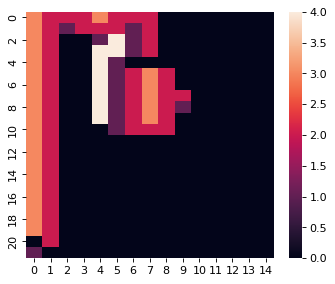

8, 8: step=48
7, 9: step=48
52

<Figure size 640x480 with 0 Axes>

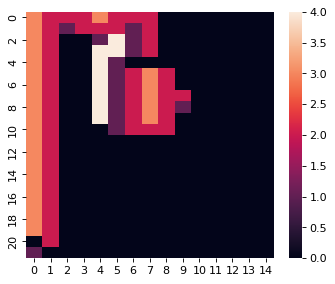

8, 9: step=45
8, 7: step=45
9, 8: step=45
7, 8: step=45
53

<Figure size 640x480 with 0 Axes>

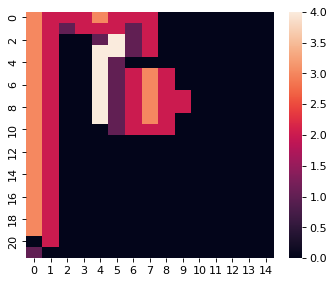

9, 7: step=44
10, 8: step=44
8, 8: step=44
elapsed time: 0.5372397899627686[s]


In [21]:
# if each point is checekd. yes:1; no:0 
checked = np.zeros(np.shape(heights)).astype(int)
# smallest steps to reach each point.
steps = np.ones(np.shape(heights)).astype(int) * 10000000
# direction to reach the point.
directions = np.zeros(np.shape(heights)).astype(int)
#direction_map = {np.array([1, 0]):1, np.array([0, 1]):2, np.array([-1, 0]):3, np.array([0, -1]):4}
directions_char = np.chararray(np.shape(heights), unicode=True)
directions_char[:] = '.'
directions_char[0, 0] = 'S'

# current position
r = start_row
c = start_col
steps[r, c] = 0
options_x = get_options(heights, r, c)

# x_next
options   = get_options(heights, r, c)
k = 0
is_end = False
#while len(get_unchecked(checked))>0:
time_start = time.time()
#while not is_end:
#while k < 100:
for k in range(54):    
    if k > 50 and k < 60:
        #print(directions_char)
        print("\r"+str(k), end="")
        plt.clf()
        plt.figure(figsize=(5, 4), dpi=80)
        ax = sns.heatmap(directions[:22, :15], vmin=0, vmax=4)
        plt.show()
    # print(f'>>>>>>>> {k}')
#     if k == 10000:
#         break
    while options:
        [r_new, c_new] = options.pop()
        #print(f">> ({r_new}, {c_new})")
        if r_new == goal_row and c_new == goal_col:
            break

        step = steps[r, c] + 1
        if step < steps[r_new, c_new]:
            steps[r_new, c_new] = step
            directions[r_new, c_new] = get_direction(np.array([r_new, c_new]) - np.array([r, c]))
            directions_char[r_new, c_new] = get_mark(np.array([r_new, c_new]) - np.array([r, c]))

        print(f"{r_new}, {c_new}: step={step}")
        
    ## update center position.
    checked[r, c] = 1
    #options_x = list(remove_duplicates(options_x))
    options_x = get_options(heights, r, c)
    #options_x = list(options_x)
    
    options_x_ = [option for option in options_x if checked[option[0], option[1]] == 0]    
    
    if options_x_:
        options_x = options_x_
        
        # choose the lagest distance except for 100000.
        options_x2 = []
        orders = []
        for option in options_x:
            r_new, c_new = option
            if r_new == goal_row and c_new == goal_col:
                steps[r_new, c_new] = steps[r, c]+1
                directions[r_new, c_new] = get_direction(np.array([r_new, c_new]) - np.array([r, c]))
                directions_char[r_new, c_new] = get_mark(np.array([r_new, c_new]) - np.array([r, c]))
                print(f"\ngoal reached at step {steps[r, c]+1}.")
                #sys.exit()
                is_end = True
            step = steps[option[0], option[1]]
            if step != 10000000:
                options_x2.append(option) 
                orders.append(step)
        if options_x2:
            options_x = options_x2
        else:
            orders = [steps[option[0], option[1]] for option in options_x]   
        
        max_id = np.argmax(orders)
        r, c = options_x[max_id]
    else:
        r = start_row
        c = start_col
        checked = np.zeros(np.shape(heights)).astype(int)
    options = get_options(heights, r, c)
    
    k += 1
print(f"elapsed time: {time.time()-time_start}[s]")

In [19]:
# paths = get_paths(directions_char)
# field = draw_paths(paths)
# print(field)
